In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [194]:
df = pd.read_csv('autotel_with_target_groupedby.csv',index_col=0)

In [195]:
df['hr_sin'] = np.sin(df.Hour*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.Hour*(2.*np.pi/24))
df['mnth_sin'] = np.sin((df.Month-1)*(2.*np.pi/12))
df['mnth_cos'] = np.cos((df.Month-1)*(2.*np.pi/12))
df['day_sin'] = np.sin((df.Day-1)*(2.*np.pi/30))
df['day_cos'] = np.cos((df.Day-1)*(2.*np.pi/30))

In [196]:
a = df.groupby('neighborhood')
groups_neighborhood = [a.get_group(x) for x in a.groups]

In [197]:
for d in groups_neighborhood:
    d.drop(['neighborhood', 'Hour','Day','Month','Date','Max Temprature','Min Temprature'],axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
df3 = pd.concat([df,pd.get_dummies(df['neighborhood'], prefix='neighborhood')],axis=1)
df3.drop(['neighborhood', 'Hour','Day','Month','Date'],axis=1, inplace=True)


In [180]:
df3.drop(['neighborhood', 'Hour','Day','Month','Date','Max Temprature','Min Temprature'],axis=1, inplace=True)



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [181]:
cols = df3.columns.tolist()
cols = cols[0:8] + cols[9:-1] + [cols[8]]
cols

['Area',
 'Population',
 'Year',
 'Temprature',
 'Relative Humidity',
 'Amount of Rain',
 'Wind Speed',
 'Wind Direction',
 'hr_sin',
 'hr_cos',
 'mnth_sin',
 'mnth_cos',
 'day_sin',
 'count']

In [182]:
X = df3[cols[:-1]].values
y = df3['count'].values

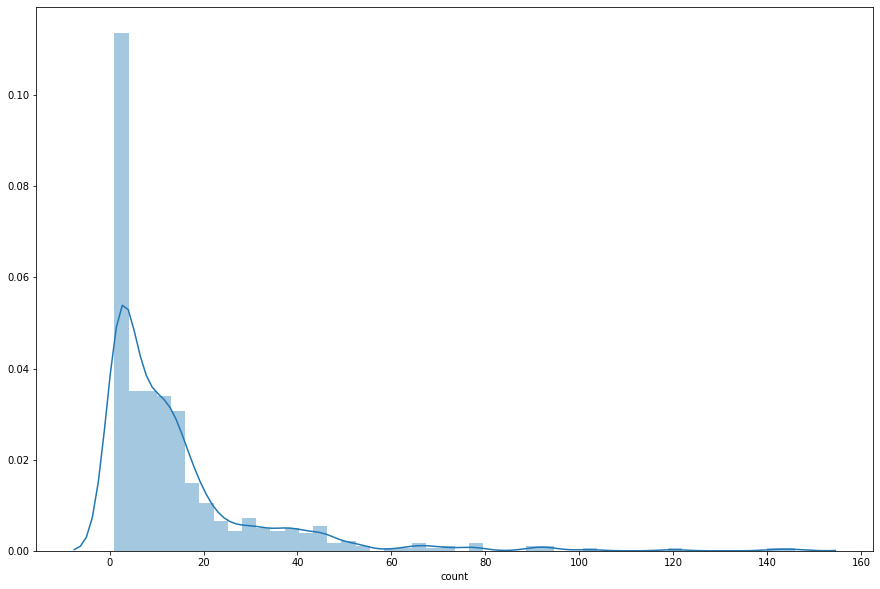

In [183]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df3['count'])

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [185]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [186]:
coeff_df = pd.DataFrame(regressor.coef_, cols[:-1], columns=['Coefficient'])
y_pred = regressor.predict(X_test)

In [187]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

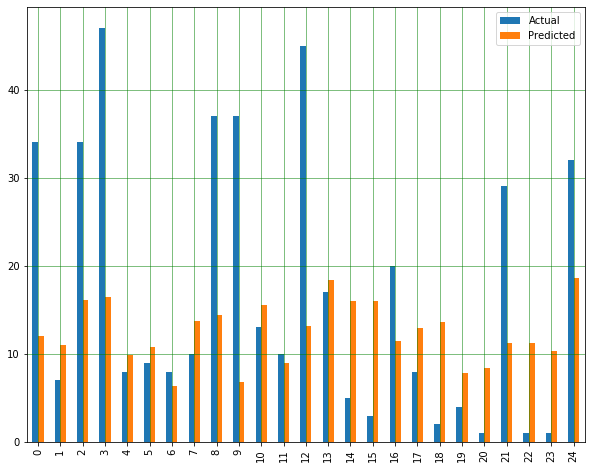

In [188]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [189]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 12.516184051837401
Mean Squared Error: 411.4082233062229
Root Mean Squared Error: 20.283200519302245
